In [1]:
import numpy as np

In [2]:
class KmeansCluster:
    '''
    Custom KMeans clustering algorithm developed just using Numpy
    
    Params:
     k (int): number of clusters
     random_state (int): random seed
     max_iter (int): number of iterations to update clusters
    '''
    def __init__(self, k: int=4, random_state: int=42, max_iter: int=1000):
        self.k = k
        self.random_state = random_state
        self.max_iter = max_iter
        self.centroids = None
        self.__wcss = []
        self.inertia_ = None
    
    
    @staticmethod
    def __euclidean_distance(x1, x2):
        '''
        Compute euclidean distance between arrays x1 and x2
        '''
        return np.sqrt(np.sum((x1 - x2) ** 2, axis=1))

    
    def __get_init_centroids(self, x):
        '''
        Initializes random 'k' centroids
        '''
        np.random.seed(self.random_state)
        rand_samp = np.random.choice(np.arange(x.shape[0]), self.k, replace=False)
        self.centroids = x[rand_samp]

    
    def fit(self, x):
        '''
        Fits the model to the data 
        
        Params:
         x: numpy.array
         Input array to identify clusters
        '''
        self.__get_init_centroids(x) # initializing 'k' random centroids from input array
        for iter in range(self.max_iter): # iterating until wcss doesn't improve
            wcss_score = 0
            clusters = np.array([]) # cluster array init
            for sample in x: # for each sample in input array x
                dist_arr = self.__euclidean_distance(sample, self.centroids) # computing euclidean distance between each sample and 'k' centroids
                clusters = np.append(clusters, np.argmin(dist_arr)) # assigning argmin of dist of sample from 'k' centroids as cluster

            for cluster_idx in range(self.k):
                subset = x[np.where(clusters==cluster_idx)].copy() # slicing input array belonging to cluster 'cluster_idx'
                self.centroids[cluster_idx] = np.mean(subset, axis=0) # updating centroids as mean of samples in a cluster
                wcss_score += np.sum(self.__euclidean_distance(self.centroids[cluster_idx], subset) ** 2) # within cluster sum of square for all samples from their centroids
            self.__wcss.append(wcss_score)

            if len(self.__wcss) >= 2:
                if np.abs(self.__wcss[-1] - self.__wcss[-2]) == 0: # checking if wcss is same
                    self.inertia_ = self.__wcss[-1]
                    break # exit when there is no improvement is found in wcss
        return self
    
    
    def predict(self, x):
        '''
        Predicts clusters of input array
        
        Params:
         x: numpy.array 
         Input array to identify clusters
         
        Returns: 
         numpy.array: cluster indices
        
        '''
        clusters = np.array([])
        for sample in x:
            dist_arr = self.__euclidean_distance(sample, self.centroids) # computing euclidean distance between each sample and centroids obtained after model fitting
            clusters = np.append(clusters, np.argmin(dist_arr)) # assigning argmin of dist of sample from centroids as cluster
        return clusters
    
    
    def __repr__(self):
        return f"KmeansCluster(k={self.k}, random_state={self.random_state}, max_iter={self.max_iter})"

# Loading and scaling Iris dataset

In [3]:
from sklearn.datasets import load_iris
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import MinMaxScaler
from sklearn.decomposition import PCA
%matplotlib inline

In [4]:
x = load_iris()['data']

In [5]:
minmax_scaler = MinMaxScaler()
x = minmax_scaler.fit_transform(x)

# Finding Best 'k' using elbow method

In [6]:
inertia = []
for k in range(1,11):
    kmeans = KmeansCluster(k=k)
    _ = kmeans.fit(x)
    inertia.append(kmeans.inertia_)

In [7]:
inertia_df = pd.DataFrame({'k': range(1, 11), 'inertia': inertia})
inertia_df

,k,inertia
0,1,41.166110
1,2,12.127791
2,3,6.982216
3,4,5.523244
4,5,4.859706
5,6,3.961393
6,7,3.777624
7,8,3.213069
8,9,2.948136
9,10,2.817561


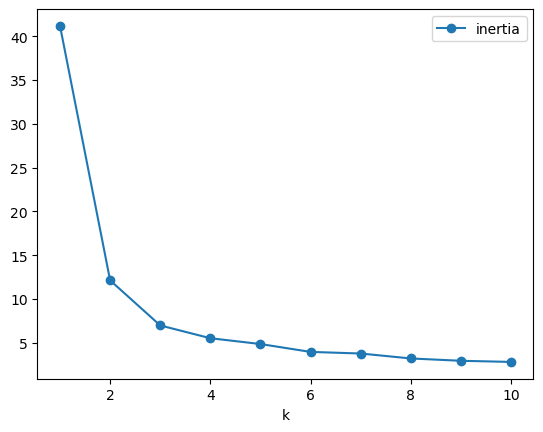

In [8]:
inertia_df.plot(x='k', y='inertia',marker='o');

# Best 'k' =3

In [9]:
kmeans = KmeansCluster(k=3)

In [10]:
kmeans.fit(x)

KmeansCluster(k=3, random_state=42, max_iter=1000)

In [11]:
clusters = kmeans.predict(x)

In [12]:
clusters

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1.,
       1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 1., 2.,
       0., 2., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0., 0., 0., 0., 0., 0., 0.,
       0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 2., 0.,
       2., 2., 2., 2., 0., 2., 2., 2., 2., 2., 2., 0., 2., 2., 2., 2., 2.,
       0., 2., 0., 2., 0., 2., 2., 0., 0., 2., 2., 2., 2., 2., 0., 0., 2.,
       2., 2., 0., 2., 2., 2., 0., 2., 2., 2., 0., 2., 2., 0.])

In [13]:
kmeans.inertia_

6.982216473785234

In [14]:
kmeans.predict(x[0:5])

array([1., 1., 1., 1., 1.])

In [15]:
pca = PCA(n_components=2)

In [16]:
X_pca = pca.fit_transform(x)

In [17]:
evr = np.cumsum(pca.explained_variance_ratio_)
print(evr)

[0.84136038 0.95887846]


In [18]:
X_pca=pd.DataFrame(X_pca)
X_pca.columns=["pc1","pc2"]
X_pca["y"]=clusters

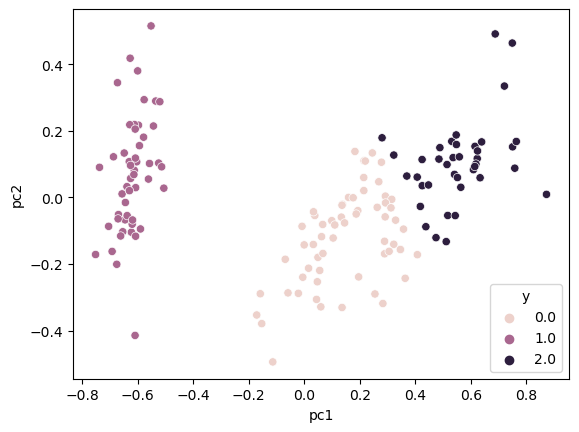

In [19]:
sns.scatterplot(X_pca, x='pc1', y='pc2', hue='y');